In [4]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import sys

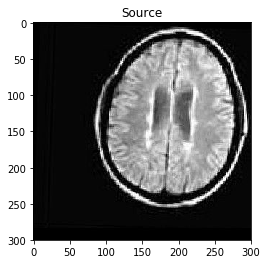

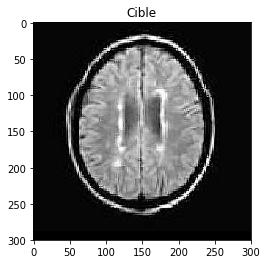

In [5]:
img=cv2.imread('Source.jpg',0)
plt.imshow(img,cmap='gray')
plt.title('Source')
plt.show()
img2=cv2.imread('Cible.jpg',0)
plt.imshow(img2,cmap='gray')
plt.title('Cible')
plt.show()

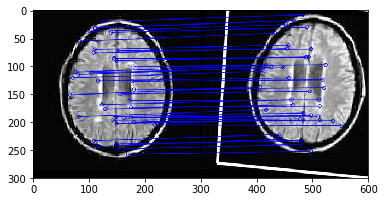

(<matplotlib.image.AxesImage at 0x1773e9e1160>, None)

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 5
img1 = cv.imread('Cible.jpg',0)          # queryImage
img2 = cv.imread('Source.jpg',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
draw_params = dict(matchColor = (0,0,250), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [7]:
defr=src_pts-dst_pts
sum_x=0
sum_y=0
h=int(src_pts.size/2)
for i in range(h):
    sum_x+=defr[i,0][0]
    sum_y+=defr[i,0][1]
print('x =',sum_x/h)
print('y =',sum_y/h,h)

x = -47.79507865157782
y = -12.110264809303034 153


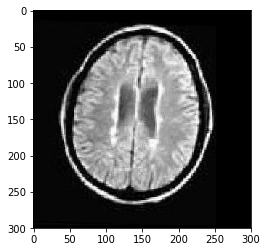

In [8]:
import cv2
rows,cols = img1.shape
x=sum_x/h
y=-sum_y/h
img2=cv2.imread('Source.jpg',0)
M = np.float32([[1,0,x],[0,1,y]]) 
dst = cv2.warpAffine(img2,M,(cols,rows))
cv2.waitKey(0)
cv2.imwrite('image88.png', dst)
plt.imshow(dst,cmap='gray')
cv2.destroyAllWindows()

In [10]:
from skimage.measure import compare_ssim
import argparse
import imutils
img5 = cv2.imread('image88.png',0)
rows1,cols1 = img5.shape
x=0
scoref=0
while(x<360):
    M = cv2.getRotationMatrix2D((cols1/2,rows1/2),x,1) #faire une rotation de x degre 
    dst = cv2.warpAffine(img5,M,(cols1,rows1))
    cv2.imwrite('image44.png', dst)
 #Load the two input images
    imageA = cv2.imread('image44.png')
    imageB = cv2.imread('Cible.jpg')
 #Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
 #Compute the Structural Similarity Index (SSIM) between the two images
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    if(scoref<score):
        scoref=score
        x+=1
    else :
        d=x
        x=370
image2 = cv2.imwrite('source_recale.png',dst)   
plt.imshow(imageA,cmap='gray')
plt.title('Source recalée')
print("SSIM = ",score)
print("degrés de rotation est : ",d)
cv2.waitKey(0)
cv2.destroyAllWindows()

ImportError: skimage._shared.geometry does not export expected C function __pyx_fuse_0point_in_polygon

### Déffirence entre image cible et image recalée

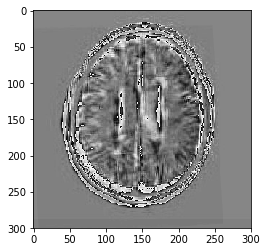

In [23]:
img3=cv2.imread('source_recale.png',0)
img2=cv2.imread('Cible.jpg',0)
img4= img2-img3+128
plt.imshow(img4,cmap='gray')


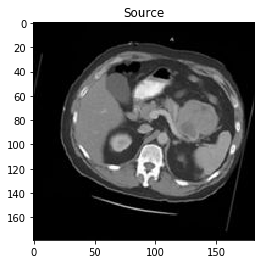

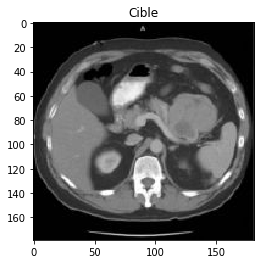

In [2]:
img=cv2.imread('imge1.jpg',0)
plt.imshow(img,cmap='gray')
plt.title('Source')
plt.show()
img2=cv2.imread('imge2.jpg',0)
plt.imshow(img2,cmap='gray')
plt.title('Cible')
plt.show()

In [24]:
def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


    homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=2.0)

    return homography


In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
img5 = cv2.imread('imge1.jpg',0)
rows1,cols1 = img5.shape
x=0
scoref=0
while(x<360):
    M = cv2.getRotationMatrix2D((cols1/2,rows1/2),x,1) #faire une rotation de x degre 
    dst = cv2.warpAffine(img4,M,(cols1,rows1))
    cv2.imwrite('image44.png', dst)
 #Load the two input images
    imageA = cv2.imread('image44.png')
    imageB = cv2.imread('imge2.jpg')
 #Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
 #Compute the Structural Similarity Index (SSIM) between the two images
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    if(scoref<score):
        scoref=score
        x+=1
    else :
        d=x
        x=370
#image2 = cv2.imwrite('source_recale.png',dst)   
plt.imshow(imageA,cmap='gray')
plt.title('Source recalée')
print("SSIM = ",score)
print("degrés de rotation est : ",d)
cv2.waitKey(0)
cv2.destroyAllWindows()

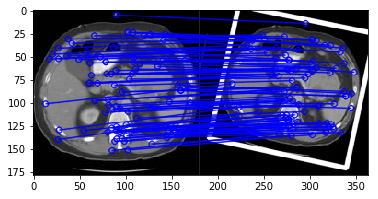

(<matplotlib.image.AxesImage at 0x25764ecfba8>, None)

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 5
img1 = cv.imread('imge2.jpg',0)          # queryImage
img2 = cv.imread('imge1.jpg',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.4*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
draw_params = dict(matchColor = (0,0,250), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [15]:
defr=src_pts-dst_pts
sum_x=0
sum_y=0
h=int(src_pts.size/2)
for i in range(h):
    sum_x+=defr[i,0][0]
    sum_y+=defr[i,0][1]
print('x =',sum_x/h)
print('y =',-sum_y/h)
print(h)

x = -8.003870492453103
y = -4.645395174131289
91


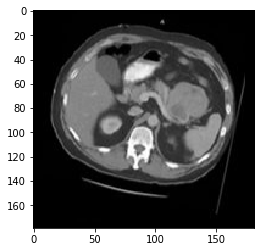

In [16]:
import cv2
rows,cols = img1.shape
x=sum_x/h
y=-sum_y/h
img2=cv2.imread('imge1.jpg',0)
M = np.float32([[1,0,x],[0,1,y]]) 
dst = cv2.warpAffine(img2,M,(cols,rows))
cv2.waitKey(0)
cv2.imwrite('image88.png', dst)
plt.imshow(dst,cmap='gray')
cv2.destroyAllWindows()

C:\Users\Berrani_Brahim10\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


SSIM =  0.2587866654730201
degrés de rotation est :  10


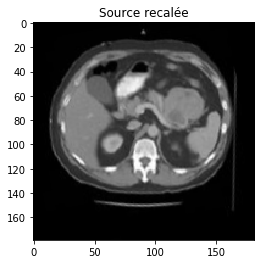

In [17]:
from skimage.measure import compare_ssim
import argparse
import imutils
img4 = cv2.imread('image88.png',0)
rows,cols = img4.shape
x=2
scoref=0
while(x<360):
    M = cv2.getRotationMatrix2D((cols/2,rows/2),x,1) #faire une rotation de x degre 
    dst = cv2.warpAffine(img4,M,(cols,rows))
    cv2.imwrite('image89.png', dst)
 #Load the two input images
    imageA = cv2.imread('image89.png')
    imageB = cv2.imread('imge2.jpg')
 #Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
 #Compute the Structural Similarity Index (SSIM) between the two images
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    d=x-1
    if(scoref>score):
        x=370
    else :
        scoref=score
        x+=1
        
image2 = cv2.imwrite('source_recale.png',dst)   
plt.imshow(imageA,cmap='gray')
plt.title('Source recalée')
print("SSIM = ",scoref)
print("degrés de rotation est : ",d)
cv2.waitKey(0)
cv2.destroyAllWindows()